In [3]:
import numpy as np
from numpy import pi
from astropy import units as u
from astropy import constants as c
from astropy.constants import m_e
from scipy.special import zeta
from matplotlib import pyplot as plt
import scipy.integrate as integrate

In [4]:
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["xtick.major.width"] = 2.5
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.major.width"] = 2.5
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["figure.titlesize"] = 28
plt.rcParams["legend.fontsize"] = 16
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['text.usetex'] = False

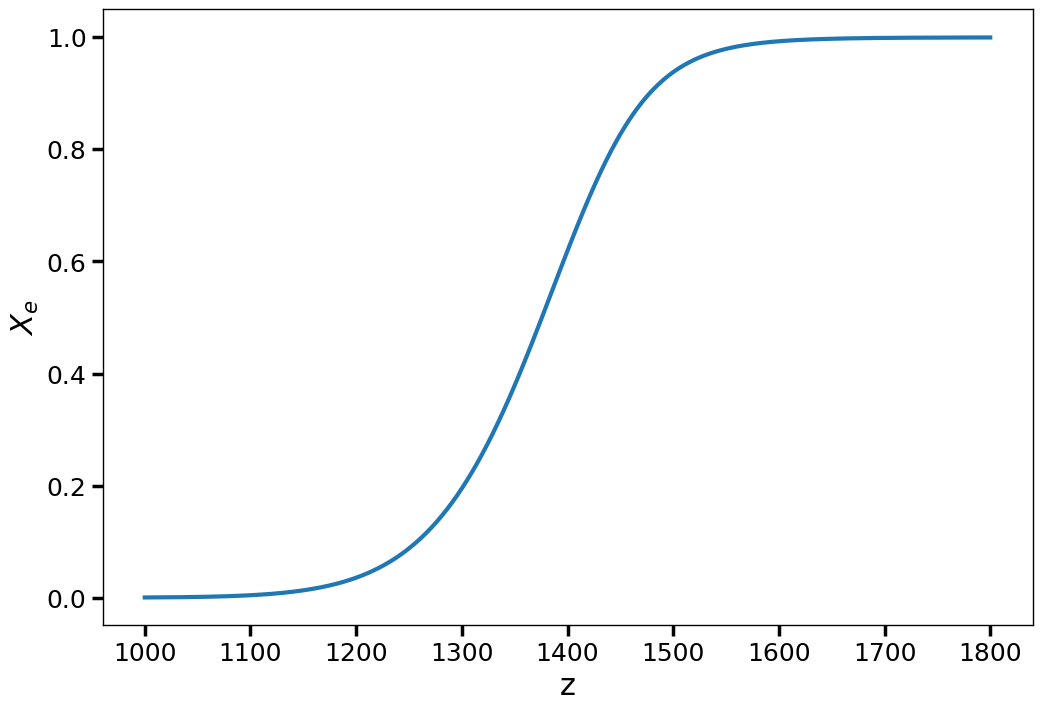

In [40]:
eta = 6e-10
me = (m_e * c.c**2).to(u.eV)

def f(z):
    T0 = 2.73*u.K
    T = T0 * (1+z)
    exp = (13.6 * u.eV) / (c.k_B.to(u.eV/u.K) * T)
    exp = exp.to(u.dimensionless_unscaled)
    assert exp.unit == u.dimensionless_unscaled
    
    return 2*zeta(3)/pi**2 * eta * ((2*pi*(c.k_B.to(u.eV/u.K) * T))/me)**(3/2) * np.exp(exp)
def Xe(z):
    return (-1 + np.sqrt(1 + 4*f(z)))/(2*f(z))

z = np.linspace(1000, 1800, 1000)

fig, ax = plt.subplots(1,1, figsize=(12,8))   
ax.plot(z, Xe(z))
ax.set_xlabel("z")
ax.set_ylabel(r"$X_e$")
plt.savefig("xe.png", dpi=100, bbox_inches="tight")
plt.show()
plt.close()

In [46]:
# Redshift at which Xe = 0.1
z = np.linspace(1000, 1800, 10000)
i = np.argmin(np.abs(Xe(z)-0.1))
z[i]

1257.6257625762576

In [47]:
# Redshift at which Xe = 0.5
z = np.linspace(1000, 1800, 10000)
i = np.argmin(np.abs(Xe(z)-0.5))
z[i]

1375.7975797579759

In [39]:
# estimate the decoupling redshift at which the Thomson scattering rate equals the Hubble rate
H0 = 70.0 * (u.km/u.s)/u.Mpc
H0 = H0.to(1.0/u.yr)
Om = 0.3
sigma_T = c.sigma_T
T0 = 2.73*u.K
k_B = c.k_B.to(u.eV/u.K)
T = T0 * (1+z)
h = c.h.to(u.s * u.eV)

rhs = (((H0 * np.sqrt(Om) * pi**2)/(eta * 2*zeta(3) *T0**3 * sigma_T)) * c.c**2 / k_B**3 * h**3)**(2/3)

z = np.linspace(1000, 1800, 10000)
A = (1+z)*Xe(z)**(2/3) - rhs
i = np.argmin(np.abs(A))
z[i]

Xe(z[i])

Om = 0.3
Ol = 0.7
z = z[i]
a = 1/(1+z)
time = lambda x: integrate.quad(lambda a: 1/(a*np.sqrt(Om*np.power(a,-3)+Ol)), 0, x) * 1/H0
time(a)

<Quantity [2.69746126e+05, 8.85106265e+01] yr>

/tmp/ipykernel_426678/2527873071.py:3: RuntimeWarning: overflow encountered in exp
  I = lambda x: integrate.quad(lambda z: z**2/(np.exp(np.sqrt(z**2+x**2))+1), 0, np.inf)[0]


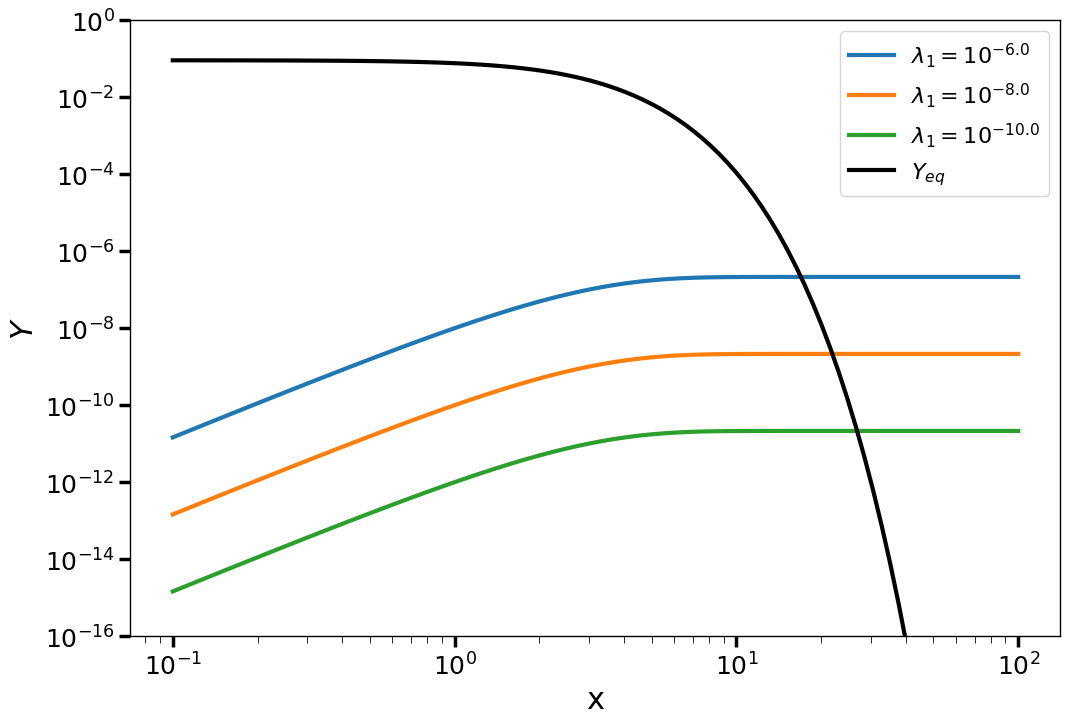

In [105]:
y0 = 1e-20

I = lambda x: integrate.quad(lambda z: z**2/(np.exp(np.sqrt(z**2+x**2))+1), 0, np.inf)[0]

#yeq = lambda x: (x/(2*pi))**(3/2) * np.exp(-x)
yeq = lambda x: 1/(2*pi**2) * I(x)

def y(x, l1):
    return integrate.quad(lambda z: l1 * z * z/(z+2) * yeq(z), 0.01, x)[0]

x = np.geomspace(0.1, 100, 100)
#y = y0 * np.exp(l1/2 * (x-4)) * (x+2)**(4*l1)


fig, ax = plt.subplots(1,1, figsize=(12,8))   

for l1 in [1e-6, 1e-8, 1e-10]:
    y_ = [y(i, l1) for i in x]
    ax.plot(x, y_, label=f"$\lambda_1=10^{{{np.log10(l1)}}}$")

ax.plot(x, [yeq(i) for i in x], color='black', label=r"$Y_{eq}$")

ax.set_ylim((1e-16, 1e0))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("x")
ax.set_ylabel(r"$Y$")
plt.legend()
plt.savefig("yeq.png", dpi=100, bbox_inches="tight")
plt.show()
plt.close()


In [9]:
# Age of universe

H0 = 70.0 * (u.km/u.s)/u.Mpc
H0 = H0.to(1.0/u.yr)

Om = 0.3
Ol = 0.7
z = 1258
a = 1/(1+z)
time = lambda x: integrate.quad(lambda a: 1/(a*np.sqrt(Om*np.power(a,-3)+Ol)), 0, x) * 1/H0
time(a)

<Quantity [3.80590720e+05, 1.24881582e+02] yr>